## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from collections import Counter
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('covtype.csv')

In [3]:
df.head(3)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   

   Horizontal_Distance_To_Fire_Points  ...  Unnamed: 45  Unnamed: 46  \
0                                6279  ...          NaN          NaN   
1                                6225  ...          NaN          NaN   
2                                6121  ...          NaN          NaN   

   Unnamed: 47  Unnamed: 48  Unnamed: 49  Unnamed: 50  Unnamed: 51  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 52  Soil_Type40  Cover_Type  
0          NaN            0           5  
1          NaN            0           5  
2          NaN            0           2  

[3 rows x 55 columns]

In [4]:
# Find the shape of dataset

df.shape

(581012, 55)

**The dataset has 5,81,012 records and 55 columns.**

In [5]:
# Find the datatype of each attribute

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  int64  
 1   Aspect                              581012 non-null  int64  
 2   Slope                               581012 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64  
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64  
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64  
 6   Hillshade_9am                       581012 non-null  int64  
 7   Hillshade_Noon                      581012 non-null  int64  
 8   Hillshade_3pm                       581012 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64  
 10  Unnamed: 10                         0 non-null       float64
 11  Unnamed: 11               

**The dataset has 55 integer columns.**

In [6]:
# Statistics for numeric attributes

df.describe()

Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...  Unnamed: 45  \
count  581012.000000                       581012.000000  ...          0.0   
mean      142.528263                         1980.291226  ...          NaN   
std        38.274529                         1324.195210  ...          NaN   
min         0.000000                            0.000000  ...          NaN   
25%       119.000000                         1024.000000  ...          NaN   
50%       143.000000                         1710.000000  ...          NaN   
75%       168.000000                         2550.000000  ...          NaN   
max       254.000000                         7173.000000  ...          NaN   

       Unnamed: 46  Unnamed: 47  Unnamed: 48  Unnamed: 49  Unnamed: 50  \
count          0.0          0.0          0.0          0.0          0.0   
mean           NaN          NaN          NaN          NaN          NaN   
std            NaN          NaN          NaN          NaN          NaN   
min            NaN          NaN          NaN          NaN          NaN   
25%            NaN          NaN          NaN          NaN          NaN   
50%            NaN          NaN          NaN          NaN          NaN   
75%            NaN          NaN          NaN          NaN          NaN   
max            NaN          NaN          NaN          NaN          NaN   

       Unnamed: 51  Unnamed: 52    Soil_Type40     Cover_Type  
count          0.0          0.0  581012.000000  581012.000000  
mean           NaN          NaN       0.015060       2.051471  
std            NaN          NaN       0.121791       1.396504  
min            NaN          NaN       0.000000       1.000000  
25%            NaN          NaN       0.000000       1.000000  
50%            NaN          NaN       0.000000       2.000000  
75%            NaN          NaN       0.000000       2.000000  
max            NaN          NaN       1.000000       7.000000  

[8 rows x 55 columns]

In [7]:
# Check for duplicates

duplicate = df[df.duplicated()]
duplicate

Empty DataFrame
Columns: [Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Unnamed: 10, Unnamed: 11, Unnamed: 12, Wilderness_Area4, Unnamed: 14, Unnamed: 15, Unnamed: 16, Unnamed: 17, Unnamed: 18, Unnamed: 19, Unnamed: 20, Unnamed: 21, Unnamed: 22, Unnamed: 23, Unnamed: 24, Unnamed: 25, Unnamed: 26, Unnamed: 27, Unnamed: 28, Unnamed: 29, Unnamed: 30, Unnamed: 31, Unnamed: 32, Unnamed: 33, Unnamed: 34, Unnamed: 35, Unnamed: 36, Unnamed: 37, Unnamed: 38, Unnamed: 39, Unnamed: 40, Unnamed: 41, Unnamed: 42, Unnamed: 43, Unnamed: 44, Unnamed: 45, Unnamed: 46, Unnamed: 47, Unnamed: 48, Unnamed: 49, Unnamed: 50, Unnamed: 51, Unnamed: 52, Soil_Type40, Cover_Type]
Index: []

[0 rows x 55 columns]

**The dataset does not have any duplicate record.**

In [8]:
# Find the total number of missing values in each column

df.isna().sum()

Elevation                                  0
Aspect                                     0
Slope                                      0
Horizontal_Distance_To_Hydrology           0
Vertical_Distance_To_Hydrology             0
Horizontal_Distance_To_Roadways            0
Hillshade_9am                              0
Hillshade_Noon                             0
Hillshade_3pm                              0
Horizontal_Distance_To_Fire_Points         0
Unnamed: 10                           581012
Unnamed: 11                           581012
Unnamed: 12                           581012
Wilderness_Area4                           0
Unnamed: 14                           581012
Unnamed: 15                           581012
Unnamed: 16                           581012
Unnamed: 17                           581012
Unnamed: 18                           581012
Unnamed: 19                           581012
Unnamed: 20                           581012
Unnamed: 21                           581012
Unnamed: 2

In [9]:
df.dropna(axis=1,inplace=True)


## Exploratory Data Analysis

In [10]:
df.skew()

Elevation                            -0.817596
Aspect                                0.402628
Slope                                 0.789273
Horizontal_Distance_To_Hydrology      1.140437
Vertical_Distance_To_Hydrology        1.790250
Horizontal_Distance_To_Roadways       0.713679
Hillshade_9am                        -1.181147
Hillshade_Noon                       -1.063056
Hillshade_3pm                        -0.277053
Horizontal_Distance_To_Fire_Points    1.288644
Wilderness_Area4                      3.575561
Soil_Type40                           7.963478
Cover_Type                            2.276574
dtype: float64

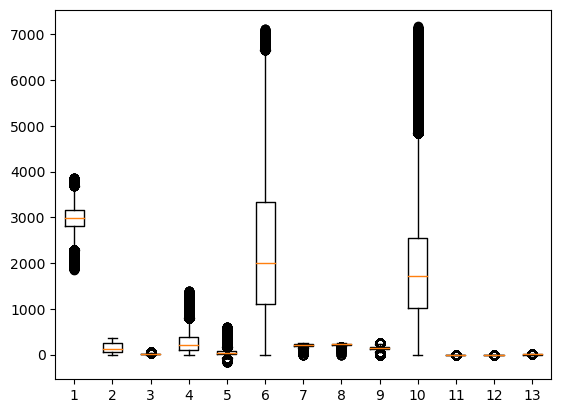

In [11]:
plt.boxplot(df)
plt.show()

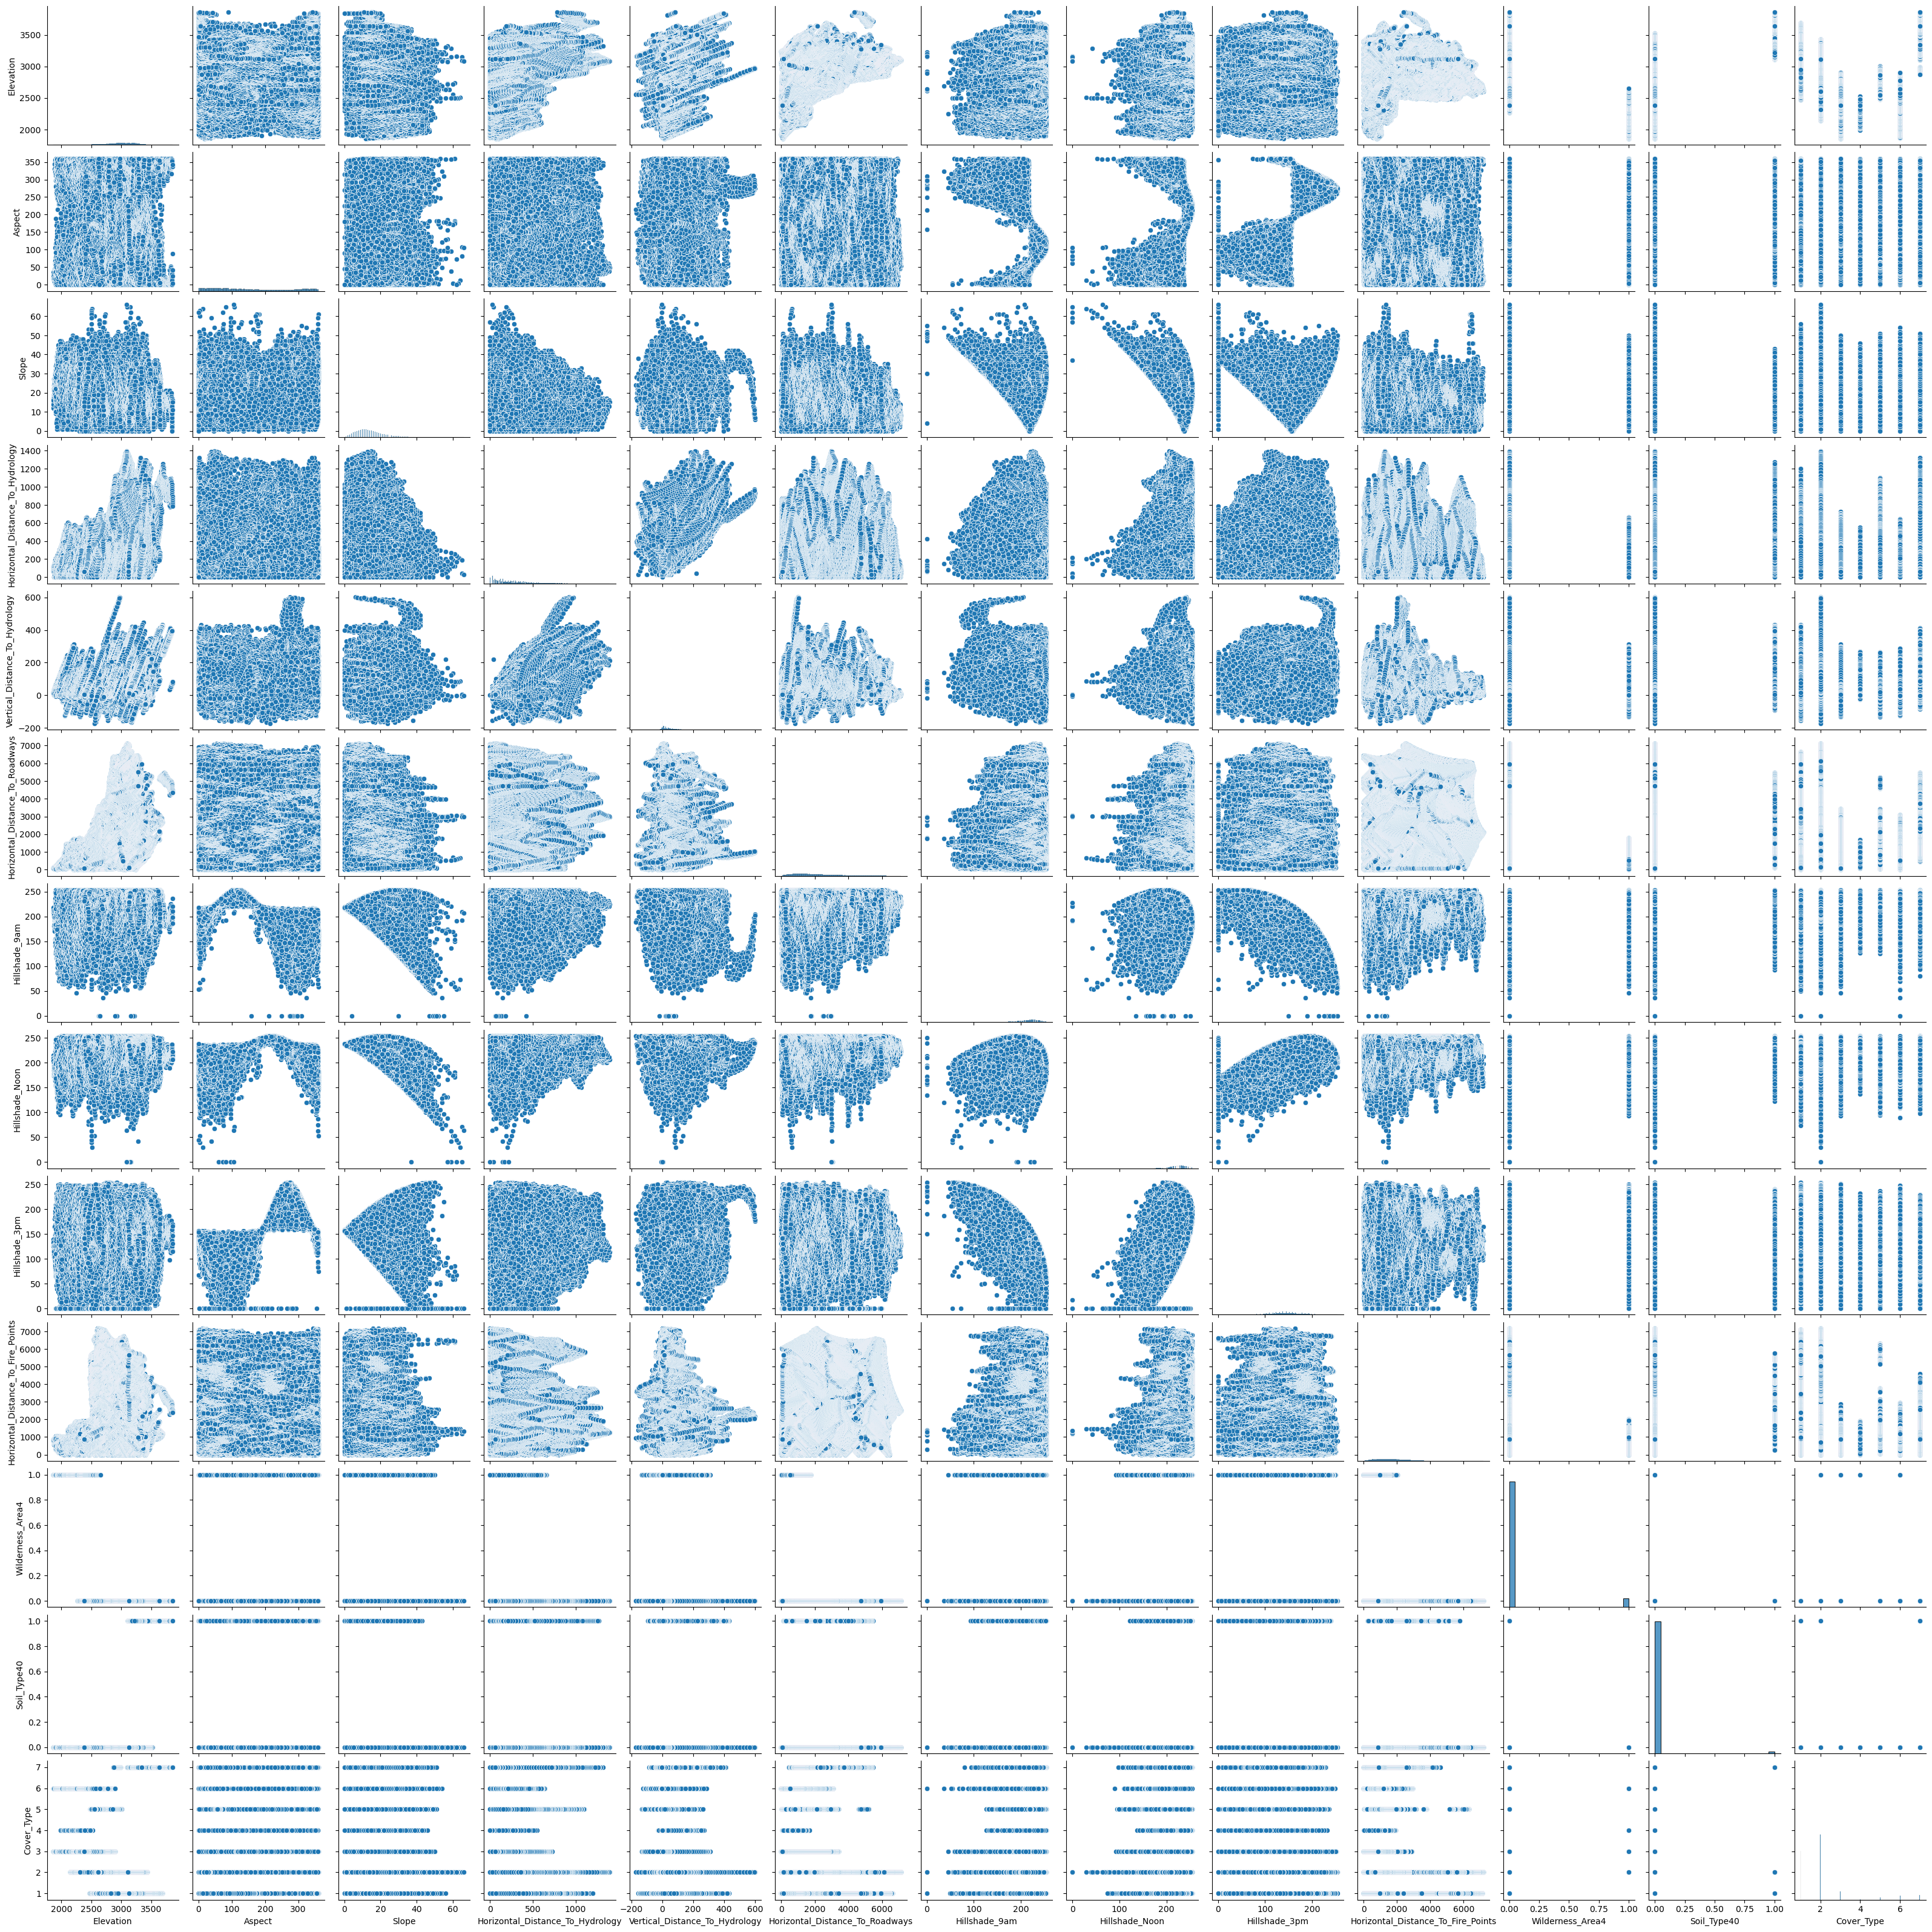

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
# PLot Correlation Matrix

corr = df.corr()
corr

Elevation    Aspect     Slope  \
Elevation                            1.000000  0.015735 -0.242697   
Aspect                               0.015735  1.000000  0.078728   
Slope                               -0.242697  0.078728  1.000000   
Horizontal_Distance_To_Hydrology     0.306229  0.017376 -0.010607   
Vertical_Distance_To_Hydrology       0.093306  0.070305  0.274976   
Horizontal_Distance_To_Roadways      0.365559  0.025121 -0.215914   
Hillshade_9am                        0.112179 -0.579273 -0.327199   
Hillshade_Noon                       0.205887  0.336103 -0.526911   
Hillshade_3pm                        0.059148  0.646944 -0.175854   
Horizontal_Distance_To_Fire_Points   0.148022 -0.109172 -0.185662   
Wilderness_Area4                    -0.619374  0.082687  0.255503   
Soil_Type40                          0.212612 -0.005866  0.025637   
Cover_Type                          -0.269554  0.017080  0.148285   

                                    Horizontal_Distance_To_Hydrology  \
Elevation                                                   0.306229   
Aspect                                                      0.017376   
Slope                                                      -0.010607   
Horizontal_Distance_To_Hydrology                            1.000000   
Vertical_Distance_To_Hydrology                              0.606236   
Horizontal_Distance_To_Roadways                             0.072030   
Hillshade_9am                                              -0.027088   
Hillshade_Noon                                              0.046790   
Hillshade_3pm                                               0.052330   
Horizontal_Distance_To_Fire_Points                          0.051874   
Wilderness_Area4                                           -0.100433   
Soil_Type40                                                 0.147020   
Cover_Type                                                 -0.020317   

                                    Vertical_Distance_To_Hydrology  \
Elevation                                                 0.093306   
Aspect                                                    0.070305   
Slope                                                     0.274976   
Horizontal_Distance_To_Hydrology                          0.606236   
Vertical_Distance_To_Hydrology                            1.000000   
Horizontal_Distance_To_Roadways                          -0.046372   
Hillshade_9am                                            -0.166333   
Hillshade_Noon                                           -0.110957   
Hillshade_3pm                                             0.034902   
Horizontal_Distance_To_Fire_Points                       -0.069913   
Wilderness_Area4                                          0.077792   
Soil_Type40                                               0.179006   
Cover_Type                                                0.081664   

                                    Horizontal_Distance_To_Roadways  \
Elevation                                                  0.365559   
Aspect                                                     0.025121   
Slope                                                     -0.215914   
Horizontal_Distance_To_Hydrology                           0.072030   
Vertical_Distance_To_Hydrology                            -0.046372   
Horizontal_Distance_To_Roadways                            1.000000   
Hillshade_9am                                              0.034349   
Hillshade_Noon                                             0.189461   
Hillshade_3pm                                              0.106119   
Horizontal_Distance_To_Fire_Points                         0.331580   
Wilderness_Area4                                          -0.270349   
Soil_Type40                                                0.016052   
Cover_Type                                                -0.153450   

                                    Hillshade_9am  Hillshade_Noon  \
Elevation      

In [14]:
# Display top 10 pairs with highest correlation 

df.corr().unstack().sort_values().drop_duplicates()

Hillshade_9am                     Hillshade_3pm                    -0.780296
Wilderness_Area4                  Elevation                        -0.619374
Aspect                            Hillshade_9am                    -0.579273
Hillshade_Noon                    Slope                            -0.526911
Hillshade_9am                     Slope                            -0.327199
                                                                      ...   
Horizontal_Distance_To_Roadways   Elevation                         0.365559
Hillshade_Noon                    Hillshade_3pm                     0.594274
Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology    0.606236
Hillshade_3pm                     Aspect                            0.646944
Elevation                         Elevation                         1.000000
Length: 79, dtype: float64

<b>Observations:-</b>
<ul>
    <li>There is a negative correlation of 0.79 between Wilderness_Area3 and Wilderness_Area1.</li>
    <li>There is a negative correlation of 0.78 between Hillshade_3pm and Hillshade_9am.</li>
    <li>There is a negative correlation of 0.79 between Wildernedd_Area3 and Wilderness_Area1.</li>

<AxesSubplot:xlabel='Cover_Type', ylabel='count'>

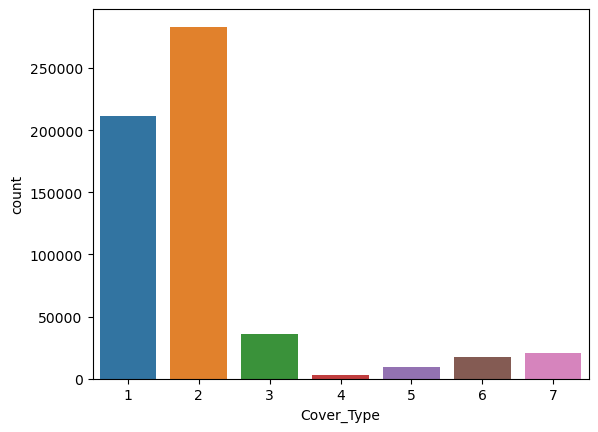

In [15]:
# Distribution of Cover_Type

sns.countplot(data=df, x='Cover_Type')

In [16]:
cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

scaler = StandardScaler()
for col in cols:
    df[[col]] = scaler.fit_transform(df[[col]])

In [17]:
# Dataset

df

Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0       -1.297805 -0.935157 -1.482820                         -0.053767   
1       -1.319235 -0.890480 -1.616363                         -0.270188   
2       -0.554907 -0.148836 -0.681563                         -0.006719   
3       -0.622768 -0.005869  0.520322                         -0.129044   
4       -1.301377 -0.988770 -1.616363                         -0.547771   
...           ...       ...       ...                               ...   
581007  -2.012130 -0.023740  0.787408                         -0.867697   
581008  -2.029988 -0.032675  0.653865                         -0.952383   
581009  -2.047847  0.029873  0.386780                         -0.985317   
581010  -2.054990  0.128163  0.119694                         -0.985317   
581011  -2.058562  0.083486 -0.147392                         -0.985317   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                            -0.796273                        -1.180146   
1                            -0.899197                        -1.257106   
2                             0.318742                         0.532212   
3                             1.227908                         0.474492   
4                            -0.813427                        -1.256464   
...                                ...                              ...   
581007                       -0.504653                        -1.437962   
581008                       -0.590424                        -1.446299   
581009                       -0.676194                        -1.449506   
581010                       -0.710502                        -1.449506   
581011                       -0.727656                        -1.464256   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            0.330743        0.439143       0.142960   
1            0.293388        0.590899       0.221342   
2            0.816364        0.742654      -0.196691   
3            0.965786        0.742654      -0.536343   
4            0.293388        0.540313       0.195215   
...               ...             ...            ...   
581007       1.040496        0.692069      -0.640851   
581008       1.040496        0.692069      -0.614724   
581009       0.891075        0.894409      -0.327327   
581010       0.666942        1.096749       0.012325   
581011       0.704298        1.046164      -0.039929   

        Horizontal_Distance_To_Fire_Points  Wilderness_Area4  Soil_Type40  \
0                                 3.246283                 0            0   
1                                 3.205504                 0            0   
2                                 3.126965                 0            0   
3                                 3.194931                 0            0   
4                                 3.165479                 0            0   
...                                    ...               ...          ...   
581007                           -0.863386                 0            0   
581008                           -0.857345                 0            0   
581009                           -0.850548                 0            0   
581010                           -0.842997                 0            0   
581011                           -0.834690                 0            0   

        Cover_Type  
0                5  
1                5  
2                2  
3                2  
4                5  
...            ...  
581007           3  
581008           3  
581009           3  
581010           3  
581011           3  

[581012 rows x 13 columns]

## Model

In [18]:
# Separate the independent and dependent variables

X = df.iloc[:, :-1]        # Independent variables
y = df.iloc[:, -1]         # Dependent variable

In [19]:
# Split the dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
def mymodel(model):
    #model create
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    #checking bias and variance
    train=model.score(X_train,y_train)
    test=model.score(X_test,y_test)
    print(f"Training score:{train},testing sscore:{test}")
    print(classification_report(y_test,ypred))
    return model

In [21]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier

In [22]:
dt=mymodel(DecisionTreeClassifier())

Training score:1.0,testing sscore:0.9192447699284872
              precision    recall  f1-score   support

           1       0.92      0.92      0.92     42212
           2       0.93      0.93      0.93     56849
           3       0.91      0.91      0.91      7094
           4       0.81      0.81      0.81       569
           5       0.77      0.79      0.78      1886
           6       0.85      0.84      0.85      3502
           7       0.93      0.92      0.92      4091

    accuracy                           0.92    116203
   macro avg       0.87      0.87      0.87    116203
weighted avg       0.92      0.92      0.92    116203



In [23]:
rf=mymodel(RandomForestClassifier())

Training score:1.0,testing sscore:0.9481768973262308
              precision    recall  f1-score   support

           1       0.95      0.94      0.95     42212
           2       0.94      0.97      0.96     56849
           3       0.94      0.95      0.94      7094
           4       0.89      0.80      0.84       569
           5       0.95      0.72      0.82      1886
           6       0.94      0.88      0.91      3502
           7       0.98      0.94      0.96      4091

    accuracy                           0.95    116203
   macro avg       0.94      0.88      0.91    116203
weighted avg       0.95      0.95      0.95    116203



In [24]:
X

Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0       -1.297805 -0.935157 -1.482820                         -0.053767   
1       -1.319235 -0.890480 -1.616363                         -0.270188   
2       -0.554907 -0.148836 -0.681563                         -0.006719   
3       -0.622768 -0.005869  0.520322                         -0.129044   
4       -1.301377 -0.988770 -1.616363                         -0.547771   
...           ...       ...       ...                               ...   
581007  -2.012130 -0.023740  0.787408                         -0.867697   
581008  -2.029988 -0.032675  0.653865                         -0.952383   
581009  -2.047847  0.029873  0.386780                         -0.985317   
581010  -2.054990  0.128163  0.119694                         -0.985317   
581011  -2.058562  0.083486 -0.147392                         -0.985317   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                            -0.796273                        -1.180146   
1                            -0.899197                        -1.257106   
2                             0.318742                         0.532212   
3                             1.227908                         0.474492   
4                            -0.813427                        -1.256464   
...                                ...                              ...   
581007                       -0.504653                        -1.437962   
581008                       -0.590424                        -1.446299   
581009                       -0.676194                        -1.449506   
581010                       -0.710502                        -1.449506   
581011                       -0.727656                        -1.464256   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            0.330743        0.439143       0.142960   
1            0.293388        0.590899       0.221342   
2            0.816364        0.742654      -0.196691   
3            0.965786        0.742654      -0.536343   
4            0.293388        0.540313       0.195215   
...               ...             ...            ...   
581007       1.040496        0.692069      -0.640851   
581008       1.040496        0.692069      -0.614724   
581009       0.891075        0.894409      -0.327327   
581010       0.666942        1.096749       0.012325   
581011       0.704298        1.046164      -0.039929   

        Horizontal_Distance_To_Fire_Points  Wilderness_Area4  Soil_Type40  
0                                 3.246283                 0            0  
1                                 3.205504                 0            0  
2                                 3.126965                 0            0  
3                                 3.194931                 0            0  
4                                 3.165479                 0            0  
...                                    ...               ...          ...  
581007                           -0.863386                 0            0  
581008                           -0.857345                 0            0  
581009                           -0.850548                 0            0  
581010                           -0.842997                 0            0  
581011                           -0.834690                 0            0  

[581012 rows x 12 columns]

In [25]:
def covertype():
    Elevation=float(input('enter Elevation:'))
    Aspect=float(input("enter Aspect :"))
    Slope=float(input("enter slope: "))
    Horizontal_Distance_To_Hydrology=float(input("enter Horizontal_Distance_To_Hydrology:"))
    Vertical_Distance_To_Hydrology=float(input("enter Vertical_Distance_To_Hydrology :"))
    Horizontal_Distance_To_Roadways=float(input("enter Horizontal_Distance_To_Roadways: "))
    Hillshade_9am=float(input("enter Hillshade_9am:"))
    Hillshade_Noon=float(input("enter Hillshade_Noon:"))
    Hillshade_3pm=float(input("enter Hillshade_3pm:"))
    Horizontal_Distance_To_Fire_Points=float(input("enter Horizontal_Distance_To_Fire_Points:"))
    Wilderness_Area4=float(input("enter Wilderness_Area4:"))
    Soil_Type40=float(input("enter Soil_Type40:"))
    
    newobs=[[Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area4,Soil_Type40]]
    yp=rf.predict(newobs)[0]
    if yp==1:
        print("Cover_Type is 1")
    elif (yp==2):
        print("Cover_Type is 2")
    elif (yp==3):
        print("Cover_Type is 3")
    elif (yp==4):
        print("Cover_Type is 4")
    elif (yp==5):
        print("Cover_Type is 5")
    elif (yp==6):
        print("Cover_Type is 6")
    elif (yp==7):
        print("Cover_Type is 7")
    

In [26]:
covertype()

enter Elevation:1
enter Aspect :1
enter slope: 1
enter Horizontal_Distance_To_Hydrology:1
enter Vertical_Distance_To_Hydrology :1
enter Horizontal_Distance_To_Roadways: 1
enter Hillshade_9am:1
enter Hillshade_Noon:1
enter Hillshade_3pm:1
enter Horizontal_Distance_To_Fire_Points:1
enter Wilderness_Area4:1
enter Soil_Type40:1
Cover_Type is 1
